# Operators

In [9]:
from qiskit.quantum_info import SparsePauliOp, random_pauli, random_hermitian, random_clifford, random_unitary, pauli_basis, Pauli, PauliList, random_density_matrix
import numpy as np

## Gate identity 

In [73]:
## H = 1/sqrt(2) (X + Z)
hdm = 1/np.sqrt(2)*(SparsePauliOp('Z') + SparsePauliOp('X'))
## HZH = X
(hdm @ SparsePauliOp('Z') @ hdm).simplify() == SparsePauliOp('X')

True

In [56]:
## Clifford gate maps one Pauli to another Pauli
theta = np.pi/4
s_gate = np.exp(1j*theta)*(np.cos(-theta)*SparsePauliOp('I') + 1j*np.sin(-theta)*SparsePauliOp('Z'))
(s_gate.adjoint() @ SparsePauliOp('X') @ s_gate).simplify() 

SparsePauliOp(['Y'],
              coeffs=[-1.+1.23259516e-32j])

In [57]:
## T gate transforms one Pauli to two Paulis
# t_gate = np.array([[1, 0], [0, np.exp(1j*np.pi/4)]])
theta = np.pi/8
t_gate = np.exp(1j*theta)*(np.cos(-theta)*SparsePauliOp('I') + 1j*np.sin(-theta)*SparsePauliOp('Z'))
# t_gate
# t_gate == t_gate_p.to_matrix()
(t_gate.adjoint() @ SparsePauliOp('X') @ t_gate).simplify()

SparsePauliOp(['X', 'Y'],
              coeffs=[ 0.70710678+2.55564914e-17j, -0.70710678+1.21941298e-17j])

In [62]:
## CNOT gate
cnot = 0.5*(SparsePauliOp('I')+SparsePauliOp('Z')).tensor(SparsePauliOp('I')) + 0.5*(SparsePauliOp('I')-SparsePauliOp('Z')).tensor(SparsePauliOp('X'))
cnot.to_matrix()

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [13]:
Statevector.from_label('0').to_operator()

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [5]:
from qiskit.quantum_info import Statevector, SparsePauliOp
Statevector.from_label('0').to_operator().tensor(SparsePauliOp('I'))+Statevector.from_label('1').to_operator().tensor(SparsePauliOp('X'))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


### Rotation (real-time evolution) of a Pauli string

https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb
$$
e^{-i XX t} = \text{CNOT} (I\otimes e^{-i X t}) \text{CNOT}
$$
[1] J.D. Whitfield, J. Biamonte and A. Aspuru-Guzik, Molecular Physics, "Simulation of electronic structure Hamiltonians using quantum computers" (2011)

In [69]:
from scipy.linalg import expm
t = 1
print(expm(1j*t*SparsePauliOp('XX').to_matrix()))
cnot.to_matrix() @ np.kron(expm(1j*t*SparsePauliOp('X').to_matrix()), SparsePauliOp('I').to_matrix()) @ cnot.to_matrix()

[[0.54030231+0.j         0.        +0.j         0.        +0.j
  0.        +0.84147098j]
 [0.        +0.j         0.54030231+0.j         0.        +0.84147098j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.84147098j 0.54030231+0.j
  0.        +0.j        ]
 [0.        +0.84147098j 0.        +0.j         0.        +0.j
  0.54030231+0.j        ]]


array([[0.54030231+0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.84147098j],
       [0.        +0.j        , 0.54030231+0.j        ,
        0.        +0.84147098j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.84147098j,
        0.54030231+0.j        , 0.        +0.j        ],
       [0.        +0.84147098j, 0.        +0.j        ,
        0.        +0.j        , 0.54030231+0.j        ]])

## Observables

In [2]:
np.linalg.multi_dot([SparsePauliOp('Z'), SparsePauliOp('X')])

array([[ 0.+0.j,  1.+0.j],
       [-1.+0.j,  0.+0.j]])

In [5]:
SparsePauliOp('IZ') @ SparsePauliOp('XI')

SparsePauliOp(['XZ'],
              coeffs=[1.+0.j])

### Pauli

In [4]:
pauli_basis(3, weight=True)

PauliList(['III', 'IIX', 'IIY', 'IIZ', 'IXI', 'IYI', 'IZI', 'XII', 'YII',
           'ZII', 'IXX', 'IXY', 'IXZ', 'IYX', 'IYY', 'IYZ', 'IZX', 'IZY',
           'IZZ', 'XIX', 'XIY', 'XIZ', 'XXI', 'XYI', 'XZI', 'YIX', 'YIY',
           'YIZ', 'YXI', 'YYI', 'YZI', 'ZIX', 'ZIY', 'ZIZ', 'ZXI', 'ZYI',
           'ZZI', 'XXX', 'XXY', 'XXZ', 'XYX', 'XYY', 'XYZ', 'XZX', 'XZY',
           'XZZ', 'YXX', 'YXY', 'YXZ', 'YYX', 'YYY', 'YYZ', 'YZX', 'YZY',
           'YZZ', 'ZXX', 'ZXY', 'ZXZ', 'ZYX', 'ZYY', 'ZYZ', 'ZZX', 'ZZY',
           'ZZZ'])

In [5]:
# 1. init from list[str]
pauli_list = PauliList(["II", "+ZI", "-iYY"])
print("1. ", pauli_list)
pauli1 = Pauli("iXI")
pauli2 = Pauli("iZZ")
# 2. init from Pauli
print("2. ", PauliList(pauli1))
# 3. init from list[Pauli]
print("3. ", PauliList([pauli1, pauli2]))
# 4. init from np.ndarray
z = np.array([[True, True], [False, False]])
x = np.array([[False, True], [True, False]])
phase = np.array([0, 1])
pauli_list = PauliList.from_symplectic(z, x, phase)
print("4. ", pauli_list)

1.  ['II', 'ZI', '-iYY']
2.  ['iXI']
3.  ['iXI', 'iZZ']
4.  ['YZ', '-iIX']


### random pauli

In [19]:
random_pauli(3)

Pauli('ZYX')

### random pauli with fixed weight

### random Hermitian

In [22]:
random_hermitian(4)

Operator([[-0.55707039+0.j        ,  0.84206074+0.26216488j,
           -0.43266326-0.16221111j,  0.05284663-0.61020708j],
          [ 0.84206074-0.26216488j, -0.17670864+0.j        ,
           -0.96305908+0.12418724j,  0.26573818-0.38604076j],
          [-0.43266326+0.16221111j, -0.96305908-0.12418724j,
            0.7518909 +0.j        , -0.82331876-0.15159718j],
          [ 0.05284663+0.61020708j,  0.26573818+0.38604076j,
           -0.82331876+0.15159718j, -3.26656753+0.j        ]],
         input_dims=(2, 2), output_dims=(2, 2))


### Energy

### Spin: magnetization, correlation, OTOC

In [4]:
n  = 4
magn_op = SparsePauliOp.from_sparse_list([('Z', [i], 1/n) for i in range(0, n)], n)
corr_op = SparsePauliOp.from_sparse_list([('ZZ', [i,i+1], 1/(n-1)) for i in range(0, n-1)], n)
magn_op

SparsePauliOp(['IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])

### Expectation value

In [ ]:
from qiskit.quantum_info import DensityMatrix

n = 4
dm = random_density_matrix(2**n)
dm.expectation_value(SparsePauliOp('X'*n))

(0.024740064059499516+0j)

## Unitaries

### Random unitary

In [24]:
random_unitary(4)

Operator([[ 0.23134833+0.04369654j, -0.32008479+0.25942886j,
            0.82028777-0.18289223j, -0.15268571-0.21254751j],
          [-0.09206845-0.63233525j, -0.6159064 -0.37495105j,
           -0.08357862-0.07129137j, -0.20810924+0.12794238j],
          [-0.56136202+0.34079881j,  0.17333584-0.45960825j,
            0.30110793-0.17322879j, -0.39228545+0.22996028j],
          [-0.28081993-0.16159555j,  0.06509485-0.25454079j,
            0.21719542-0.337287j  ,  0.79330534-0.18902107j]],
         input_dims=(2, 2), output_dims=(2, 2))


### Random gate

In [25]:
random_clifford(4)

Clifford(array([[False,  True,  True, False,  True,  True,  True, False, False],
       [ True, False,  True, False,  True,  True,  True, False,  True],
       [False,  True,  True, False, False, False, False,  True, False],
       [False, False, False, False,  True,  True,  True, False, False],
       [False,  True,  True,  True, False,  True, False, False, False],
       [False,  True,  True, False, False,  True,  True,  True,  True],
       [ True, False,  True,  True, False, False, False, False, False],
       [ True, False, False,  True, False, False,  True,  True, False]]))

## Measures

### (Anti) commutator

## Different norms

### Vector induced norm

In [ ]:
op = SparsePauliOp.from_list([("XIIZI", 1), ("IYIIY", 2)])
print('op: ', op)
print('Spectral norm: ', norm(op, ord=2))
print('Trace norm: ', norm(op, ord='nuc'))
print('Frobenius norm: ', norm(op, ord='fro'))
# print(norm(SparsePauliOp.from_list([("XYZI", 1)]), ord='nuc'))

op:  SparsePauliOp(['XIIZI', 'IYIIY'],
              coeffs=[1.+0.j, 2.+0.j])
Spectral norm:  3.0000000000000004
Trace norm:  63.999999999999986
Frobenius norm:  12.649110640673518


### Schatten p norm

In [ ]:
test = SparsePauliOp.from_list([('XX', 2), ('YX', 3)])
np.linalg.norm(test.to_matrix(), ord='nuc')
np.linalg.norm(test.to_matrix(), ord=1)

3.605551275463989

## Entenglement measures

In [ ]:
### purity
### entropy
### negativity
### concurrence

In [ ]:
n = 4
ket = random_statevector(4).data
# ket = Statevector.from_label('+').data
dm = random_density_matrix(2**n).data
entropy(ket, base=2)
entropy(dm, base=2)

3.253540852652231

Text(0.5, 1.0, 'Entropy distribution')

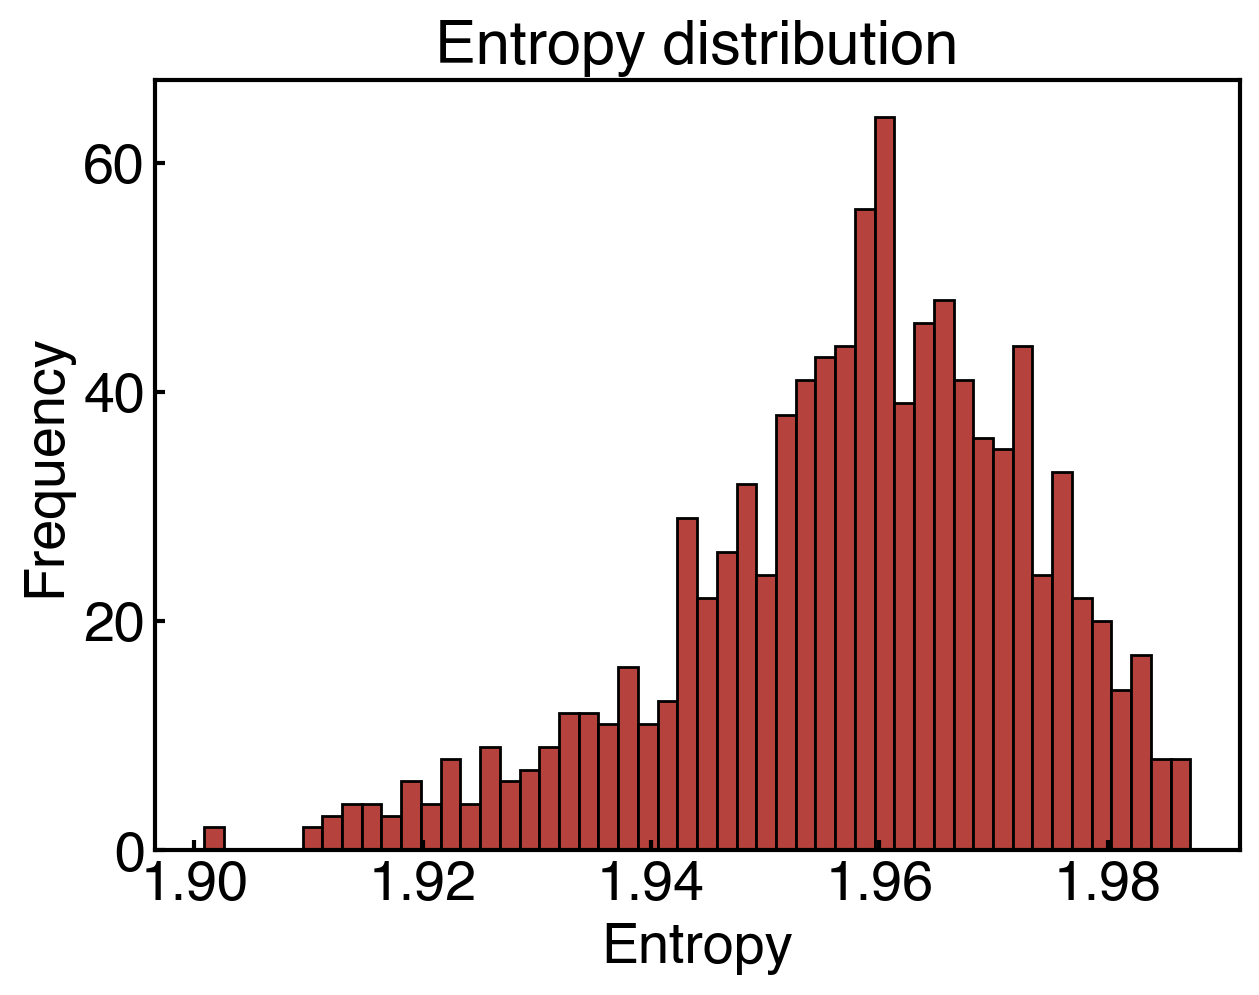

In [12]:
from qiskit.quantum_info import partial_trace, entropy
entropy_list = [entropy(partial_trace(random_density_matrix(2**n).data, [0,1]), base=2) for _ in range(1000)]

from utils import *
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(entropy_list, bins=50, edgecolor='black')
ax.set_xlabel('Entropy'); ax.set_ylabel('Frequency'); ax.set_title('Entropy distribution')

In [ ]:
commutator(SparsePauliOp("XIIZI"), SparsePauliOp("XXIZI")).simplify()
anti_commutator(SparsePauliOp("XIIZI"), SparsePauliOp("XXIZI")).simplify()

SparsePauliOp(['IXIII'],
              coeffs=[2.+0.j])

## Quantum circuit

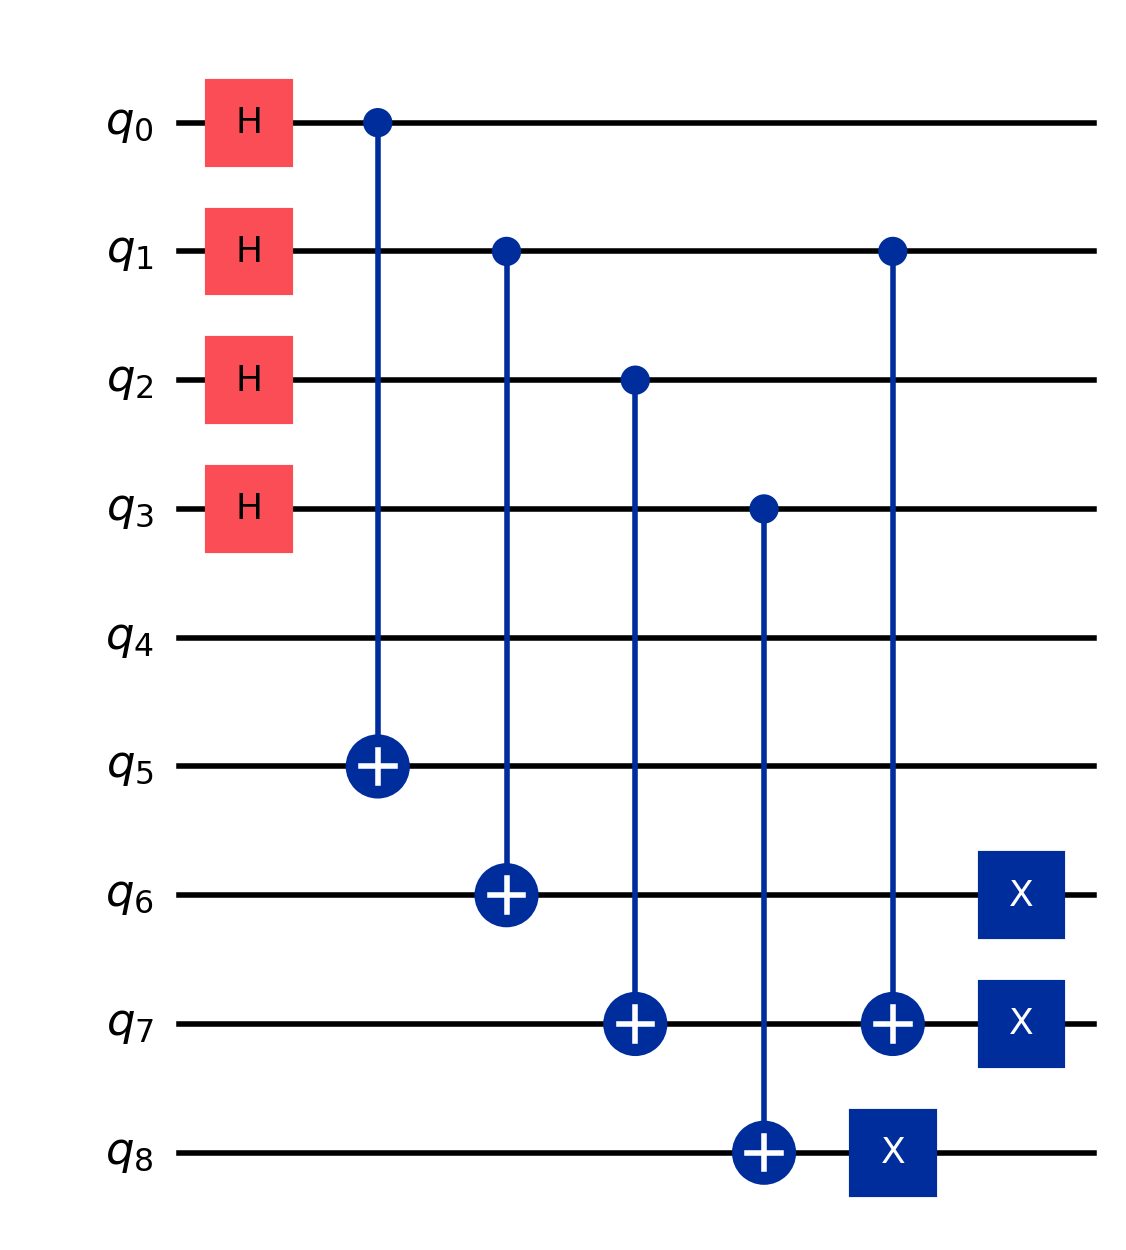

In [8]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(9)
for idx in range(4):
   qc.h(idx)
   qc.cx(idx, idx+5)
 
qc.cx(1, 7)
qc.x(8)
qc.x(7)
qc.x(6)
qc.draw('mpl')